#### Link: https://debuggercafe.com/image-classification-using-tensorflow-on-custom-dataset/

#### IMPORT DEPENDENCIES

In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib

matplotlib.style.use('ggplot')

#### DATA PREPROCESSING

In [2]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = 'zentangle_image/training'
VALID_DATA_DIR = 'zentangle_image/testing'

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    shuffle=True,
    target_size=IMAGE_SHAPE,
)
valid_generator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    shuffle=False,
    target_size=IMAGE_SHAPE,
)

Found 84 images belonging to 4 classes.
Found 35 images belonging to 4 classes.


#### BUILD AND COMPILE MODEL

In [4]:
def build_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model(num_classes=4)

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 32)        0

#### TRAIN THE MODEL

In [6]:
EPOCHS = 10
BATCH_SIZE = 2

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator) // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= len(valid_generator) // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.4220 - accuracy: 0.0000e+00 - val_loss: 1.2570 - val_accuracy: 0.5312
Epoch 2/10
1/1 [==============================] - 0s 212ms/step - loss: 1.3241 - accuracy: 0.4500 - val_loss: 1.1900 - val_accuracy: 0.4688
Epoch 3/10
1/1 [==============================] - 0s 269ms/step - loss: 1.3883 - accuracy: 0.3438 - val_loss: 1.1924 - val_accuracy: 0.4688
Epoch 4/10
1/1 [==============================] - 0s 274ms/step - loss: 1.3202 - accuracy: 0.3750 - val_loss: 1.2101 - val_accuracy: 0.4688
Epoch 5/10
1/1 [==============================] - 0s 272ms/step - loss: 1.2450 - accuracy: 0.4062 - val_loss: 1.2101 - val_accuracy: 0.4688
Epoch 6/10
1/1 [==============================] - 0s 264ms/step - loss: 1.2410 - accuracy: 0.4375 - val_loss: 1.2068 - val_accuracy: 0.4688
Epoch 7/10
1/1 [==============================] - 0s 280ms/step - loss: 1.3797 - accuracy: 0.2812 - val_loss: 1.2025 - val_accuracy: 0.4688
Epoch 8/10
1/1 [===

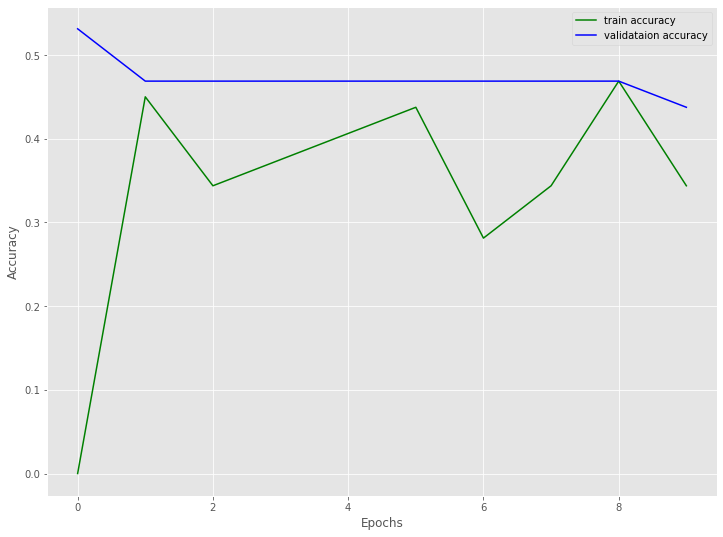

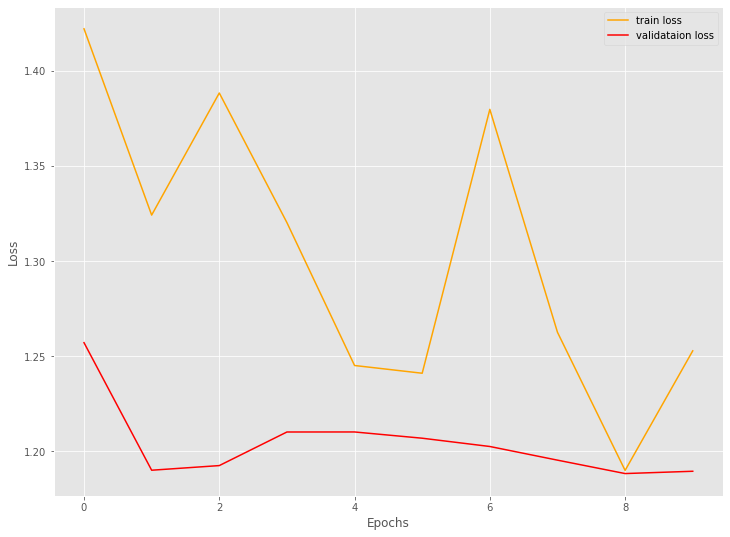

In [7]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()

save_plots(train_acc, valid_acc, train_loss, valid_loss)